<a href="https://colab.research.google.com/github/k-washi/machine-learning-cookbook/blob/master/pre-processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前処理

## データセットのスケーリング
SVMやロジステック回帰などの多くのアルゴリズムでは、特徴的なnull平均を持つデーターセットに対して、パーフォーマンスの向上が見て取れる。

+ 平均・分散のスケーリング
+ 範囲スケーリング [0, 1]

### 欠点

+ 外れ値に敏感になる。(平均、偏差に影響し、外れ値方向にシフトする)

median, 50th percentile, quartile(Q2)を用いる
+ MinMaxScaler：データが0~1に入るよう変換
+ StandardSclare：平均0、分散1になるように変換
+ [RobustSclaer](https://helve-python.hatenablog.jp/entry/scikitlearn-scale-conversion#%E5%A4%96%E3%82%8C%E5%80%A4%E3%81%AB%E9%A0%91%E5%81%A5%E3%81%AA%E6%A8%99%E6%BA%96%E5%8C%96)：中央値と四分位数で変換。外れ値を無視できる変換方法

+ Normalize：特徴量ベクトルがのユークリッド長1になるように変換。


In [0]:
!pip install scikit-learn
!pip install seaborn

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

In [0]:


nb_s = 200
mu = [1.0, 1.0]
covm = [[4.0, 0.0],[0.0, 0.8]]

X = np.random.multivariate_normal(mean=mu, cov=covm, size=nb_s)

ss = StandardScaler()
X_ss = ss.fit_transform(X)
rs = RobustScaler(quantile_range=(10, 90))
X_rs = rs.fit_transform(X)
mms = MinMaxScaler(feature_range=(-1, 1))
X_mms = mms.fit_transform(X)

nz = Normalizer(norm='l2')
X_nz = nz.fit_transform(X)

Text(0.5, 1.0, 'Normalized dataset')

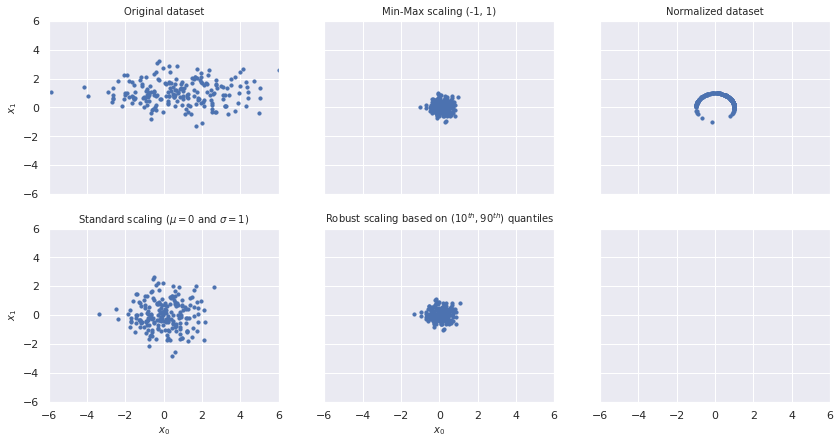

In [28]:
sns.set()
fig, ax = plt.subplots(2, 3, figsize=(14, 7), sharex=True, sharey=True)

ax[0, 0].scatter(X[:, 0], X[:, 1], s=10)
ax[0, 0].set_xlim([-6, 6])
ax[0, 0].set_ylim([-6, 6])
ax[0, 0].set_ylabel(r'$x_1$', fontsize=10)
ax[0, 0].set_title('Original dataset', fontsize=10)

ax[0, 1].scatter(X_mms[:, 0], X_mms[:, 1], s=10)
ax[0, 1].set_xlim([-6, 6])
ax[0, 1].set_ylim([-6, 6])
ax[0, 1].set_title(r'Min-Max scaling (-1, 1)', fontsize=10)

ax[1, 0].scatter(X_ss[:, 0], X_ss[:, 1], s=10)
ax[1, 0].set_xlim([-6, 6])
ax[1, 0].set_ylim([-6, 6])
ax[1, 0].set_xlabel(r'$x_0$', fontsize=10)
ax[1, 0].set_ylabel(r'$x_1$', fontsize=10)
ax[1, 0].set_title(r'Standard scaling ($\mu=0$ and $\sigma=1$)', fontsize=10)

ax[1, 1].scatter(X_rs[:, 0], X_rs[:, 1], s=10)
ax[1, 1].set_xlim([-6, 6])
ax[1, 1].set_ylim([-6, 6])
ax[1, 1].set_xlabel(r'$x_0$', fontsize=10)
ax[1, 1].set_title(r'Robust scaling based on ($10^{th}, 90^{th}$) quantiles', fontsize=10)

ax[0, 2].scatter(X_nz[:, 0], X_nz[:, 1], s=10)
ax[0, 2].set_xlim([-6, 6])
ax[0, 2].set_ylim([-6, 6])
ax[1, 1].set_xlabel(r'$x_0$', fontsize=10)
ax[0, 2].set_title(r'Normalized dataset', fontsize=10)

# ホワイトニング

データセットに恒等共分散行列により変換する操作によりデータセットを無相関化する。
深層学習における利点として、勾配が原点周辺で高くなり、端では活性化関数が飽和することを改善し、収束が早くなる。
StandardScalerと異なり、共分散行列を考慮して計算している。


In [0]:
def zero_center(X):
    return X - np.mean(X, axis=0)


def whiten(X, correct=True):
    Xc = zero_center(X)
    _, L, V = np.linalg.svd(Xc)
    W = np.dot(V.T, np.diag(1.0 / L))
    return np.dot(Xc, W) * np.sqrt(X.shape[0]) if correct else 1.0

In [36]:
print(X.shape)
np.sqrt(X.shape[0])

(200, 2)


14.142135623730951

In [42]:
# Perform whitening
X_whiten = whiten(X)
# Show original and whitened covariance matrices
print(np.cov(X.T))
print(np.cov(X_whiten.T))


[-7.92768629e-16 -8.85402862e-15]
[[3.98954067 0.02453776]
 [0.02453776 0.69299769]]
[[ 1.00502513e+00 -3.39677946e-18]
 [-3.39677946e-18  1.00502513e+00]]


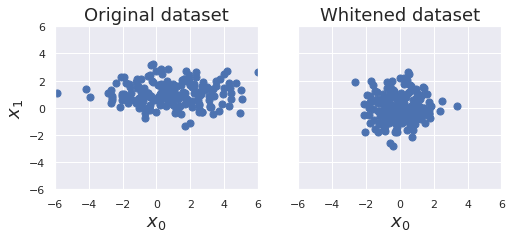

In [34]:

sns.set()

fig, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

ax[0].scatter(X[:, 0], X[:, 1], s=50)
ax[0].set_xlim([-6, 6])
ax[0].set_ylim([-6, 6])
ax[0].set_xlabel(r'$x_0$', fontsize=18)
ax[0].set_ylabel(r'$x_1$', fontsize=18)
ax[0].set_title('Original dataset', fontsize=18)

ax[1].scatter(X_whiten[:, 0], X_whiten[:, 1], s=50)
ax[1].set_xlim([-6, 6])
ax[1].set_ylim([-6, 6])
ax[1].set_xlabel(r'$x_0$', fontsize=18)
ax[1].set_title(r'Whitened dataset', fontsize=18)
plt.show()



データーセット

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

np.random.seed(1000)

X, Y = make_classification(n_samples=500, n_classes=5, n_features=50, n_informative=10,
                               n_redundant=5, n_clusters_per_class=3, random_state=1000)

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1000)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(350, 50)
(350,)
(150, 50)
(150,)
